In [2]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr


In [24]:
with open('../data/cleaned_dataframe.pickle','rb') as read_file:
    df = pickle.load(read_file)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 4116 to 120626
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              9304 non-null   object        
 1   Facility        9551 non-null   object        
 2   testdate        9373 non-null   datetime64[ns]
 3   ageattest       9551 non-null   float64       
 4   Gender          9551 non-null   object        
 5   Country         9551 non-null   object        
 6   ethnicgroup     4517 non-null   object        
 7   height          9551 non-null   float64       
 8   weight          9551 non-null   float64       
 9   BMI             9551 non-null   float64       
 10  BetaMed         9286 non-null   float64       
 11  ANYCVD          9551 non-null   float64       
 12  COPD            8667 non-null   float64       
 13  Mode            9551 non-null   object        
 14  max_load_watts  755 non-null    object        
 15 

In [26]:
df = df[df.peak_rpe < 17]

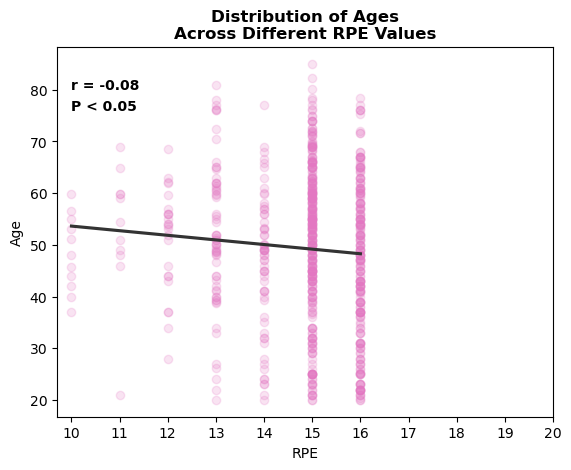

In [37]:
corr, p = pearsonr(df["peak_rpe"], df["ageattest"])
# print(f"Pearsons correlation: {corr:.2f}")
# print(f"Pearsons sig: {p:.3f}")

# corr, _ = spearmanr(df["peak_rpe"], df["FRIEND_perc"])
# print('Spearmans correlation: %.3f' % corr)

sns.regplot(x=df["peak_rpe"], 
            y=df["ageattest"], 
            ci=None,
            data=df,
            color = "C6",
            scatter_kws={'alpha':0.2}, 
            line_kws={"color": "0.2"})
plt.text(10, 80, f"r = {corr:.2f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
p_val = "< 0.05" if p < 0.05 else f"{p:.2f}"
plt.text(10, 76, f"P {p_val}", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.ylabel('Age')
plt.xlabel('RPE')
plt.xticks(list(range(10,21,1)))
plt.title('Distribution of Ages\nAcross Different RPE Values', weight='bold')

plt.show()

In [34]:
df.Gender.value_counts()

Male      369
Female    293
Name: Gender, dtype: int64

In [39]:
(369)/(369+293)

0.5574018126888217

In [40]:
5632/9551

0.5896764736676787

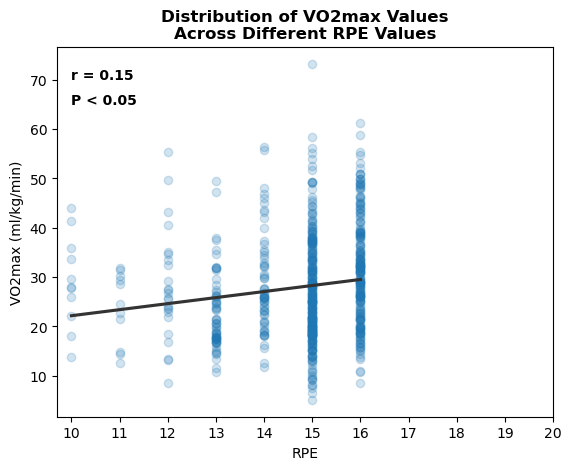

In [38]:
corr, p = pearsonr(df["peak_rpe"], df["vo2_ml_kg_min"])
# print(f"Pearsons correlation: {corr:.2f}")
# print(f"Pearsons sig: {p:.3f}")

# corr, _ = spearmanr(df["peak_rpe"], df["vo2_ml_kg_min"])
# print('Spearmans correlation: %.3f' % corr)

sns.regplot(x=df["peak_rpe"], 
            y=df["vo2_ml_kg_min"], 
            ci=None,
            data=df,
            color = "C0",
            scatter_kws={'alpha':0.2}, 
            line_kws={"color": "0.2"})
plt.text(10, 70, f"r = {corr:.2f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
p_val = "< 0.05" if p < 0.05 else f"{p:.2f}"
plt.text(10, 65, f"P {p_val}", horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.ylabel('VO2max (ml/kg/min)')
plt.xlabel('RPE')
plt.xticks(list(range(10,21,1)))
plt.title('Distribution of VO2max Values\nAcross Different RPE Values', weight='bold')

plt.show()